# Data Cleaning, Integration, and Visualisation

## 1. malicious_phish Kaggle Dataset Visualisation

In [1]:
import pandas as pd
dataset = pd.read_csv("../dataset/malicious_phish.csv")
print(dataset)

                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
labels = np.array(dataset.type.unique())
labels.sort()
labels

array(['benign', 'defacement', 'malware', 'phishing'], dtype=object)

In [4]:
counts = dataset.groupby(['type']).count()
print(counts)

               url
type              
benign      428103
defacement   96457
malware      32520
phishing     94111


In [5]:
counts = np.array(counts).reshape(-1)
counts

array([428103,  96457,  32520,  94111])

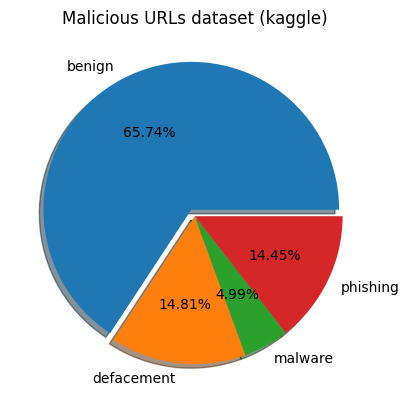

In [6]:
plt.pie(np.array(counts),explode=[0.05,0,0,0], labels=labels, autopct='%1.2f%%',shadow=True )
plt.title("Malicious URLs dataset (kaggle)")
plt.show()

#### covert labels in two categories, danger and safe.

In [7]:
dataset['type'] = np.where(dataset['type']=='benign','safe','danger')
dataset

,url,type
0,br-icloud.com.br,danger
1,mp3raid.com/music/krizz_kaliko.html,safe
2,bopsecrets.org/rexroth/cr/1.htm,safe
3,http://www.garage-pirenne.be/index.php?option=...,danger
4,http://adventure-nicaragua.net/index.php?optio...,danger
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,danger
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,danger
651188,www.gamespot.com/xbox360/action/deadspace/,danger
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),danger


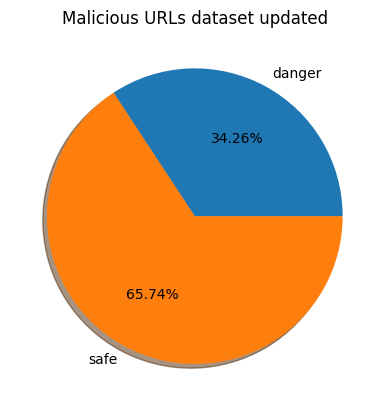

In [8]:
plt.pie(np.array(dataset.groupby(['type']).count()).reshape(-1), labels=['danger','safe'], autopct='%1.2f%%',shadow=True )
plt.title("Malicious URLs dataset updated")
plt.show()

## 2. Clean and add URLhause phising links to database 

In [9]:
dataset2 = pd.read_csv("../dataset/urlhause_links.csv")
dataset2

,url
0,http://117.216.22.215:40288/Mozi.m
1,http://117.212.172.53:47514/Mozi.m
2,http://117.216.3.221:54646/Mozi.m
3,http://123.5.126.245:36562/Mozi.m
4,http://182.124.147.217:50588/bin.sh
...,...
140221,http://58.230.89.42:34092/.i
140222,http://63.245.122.93:29703/.i
140223,http://123.194.235.37:49320/.i
140224,http://da.alibuf.com:3/445.exe


In [10]:
labels_temp = pd.DataFrame(["danger" for i in range(len(dataset2))])

In [11]:
dataset2 = pd.concat([dataset2,labels_temp], axis=1)

In [12]:
dataset2.rename(columns={0:'type'},inplace=True)
dataset2

,url,type
0,http://117.216.22.215:40288/Mozi.m,danger
1,http://117.212.172.53:47514/Mozi.m,danger
2,http://117.216.3.221:54646/Mozi.m,danger
3,http://123.5.126.245:36562/Mozi.m,danger
4,http://182.124.147.217:50588/bin.sh,danger
...,...,...
140221,http://58.230.89.42:34092/.i,danger
140222,http://63.245.122.93:29703/.i,danger
140223,http://123.194.235.37:49320/.i,danger
140224,http://da.alibuf.com:3/445.exe,danger


## 3. Integrate Both Datasets

In [13]:
df = pd.concat([dataset,dataset2], axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df

,url,type
0,http://variety.com/2015/film/news/beauty-and-t...,safe
1,people.famouswhy.com/meaghan_rath/directory.html,safe
2,http://tobogo.net/cdsb/board.php?board=novel&b...,safe
3,kintazona.com/aol/index.htm,safe
4,http://www.makeascene.com.au/index.php/about-u...,danger
...,...,...
791412,promocao.master.br.ms/,safe
791413,usidentify.com/l/beckles,safe
791414,new.music.yahoo.com/laurindo-almeida/,safe
791415,facebook.com/pages/Rocco-Placentino/1126795087...,safe


In [14]:
df.describe()

,url,type
count,791417,791417
unique,781332,2
top,http://style.org.hc360.com/css/detail/mysite/s...,safe
freq,180,428103


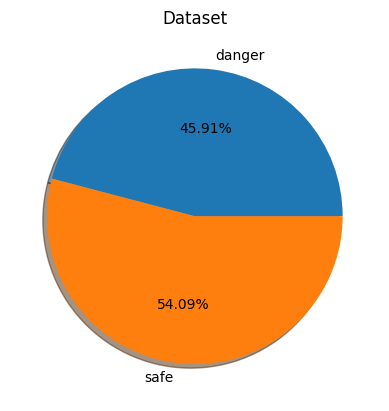

In [15]:
plt.pie(np.array(df.groupby(['type']).count()).reshape(-1), labels=['danger','safe'], autopct='%1.2f%%',shadow=True )
plt.title("Dataset")
plt.show()

Drop Duplicates and NULL values

In [16]:
df = df.drop_duplicates(subset=['url'])
df = df.dropna().reset_index(drop=True)
df

,url,type
0,http://variety.com/2015/film/news/beauty-and-t...,safe
1,people.famouswhy.com/meaghan_rath/directory.html,safe
2,http://tobogo.net/cdsb/board.php?board=novel&b...,safe
3,kintazona.com/aol/index.htm,safe
4,http://www.makeascene.com.au/index.php/about-u...,danger
...,...,...
781327,promocao.master.br.ms/,safe
781328,usidentify.com/l/beckles,safe
781329,new.music.yahoo.com/laurindo-almeida/,safe
781330,facebook.com/pages/Rocco-Placentino/1126795087...,safe


In [17]:
df.describe()

,url,type
count,781332,781332
unique,781332,2
top,http://variety.com/2015/film/news/beauty-and-t...,safe
freq,1,428077


## 4. Final dataset visualisation

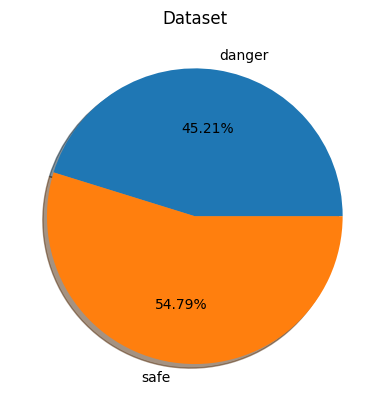

In [18]:
plt.pie(np.array(df.groupby(['type']).count()).reshape(-1), labels=['danger','safe'], autopct='%1.2f%%',shadow=True )
plt.title("Dataset")
plt.show()

## 5. label encoding 

In [19]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df['type'] = lb.fit_transform(df['type'])
df

,url,type
0,http://variety.com/2015/film/news/beauty-and-t...,1
1,people.famouswhy.com/meaghan_rath/directory.html,1
2,http://tobogo.net/cdsb/board.php?board=novel&b...,1
3,kintazona.com/aol/index.htm,1
4,http://www.makeascene.com.au/index.php/about-u...,0
...,...,...
781327,promocao.master.br.ms/,1
781328,usidentify.com/l/beckles,1
781329,new.music.yahoo.com/laurindo-almeida/,1
781330,facebook.com/pages/Rocco-Placentino/1126795087...,1


In [20]:
# we can observe that "http://95.214.24.120/C/2.txt" was danger and after encoding it is 0, so 0=attack and 1=safe

Save Final Dataset

In [21]:
df.to_csv("../dataset/df_final.csv",index=False)

# # Another Phising Data From Kaggle to Validation(Testing)

In [22]:
import pandas as pd
dataset = pd.read_csv("../dataset/Phishing_Site_URLs_Kaggle.zip")
dataset = dataset.sample(frac=1)
print(dataset)

                                                      URL Label
134267        image-web.com/plugins/countto/dropboxjancag   bad
160574  community.vzw.com/t5/DROID-X-by-Motorola/3G-hi...  good
139713     abcnews.go.com/Politics/story?id=806631&page=1  good
368379  kickoff.com/league/nedbank-cup/match-report/57...  good
477191                    youtube.com/watch?v=miTqPF9boSo  good
...                                                   ...   ...
55708                       www.ramseyelectronics.com/te/  good
167828  ebooks.adelaide.edu.au/r/rabelais/francois/r11...  good
323479                           eu33.com/records-Pinker/  good
259269               wiki.reliccommunity.com/Relic_Online  good
51358                          www.sticktrade.com/hl.html  good

[549346 rows x 2 columns]


In [23]:
dataset.rename(columns={'URL':'url','Label':'type'},inplace=True)
dataset = dataset.drop_duplicates(subset=['url'])
dataset = dataset.dropna().reset_index(drop=True)
dataset

,url,type
0,image-web.com/plugins/countto/dropboxjancag,bad
1,community.vzw.com/t5/DROID-X-by-Motorola/3G-hi...,good
2,abcnews.go.com/Politics/story?id=806631&page=1,good
3,kickoff.com/league/nedbank-cup/match-report/57...,good
4,youtube.com/watch?v=miTqPF9boSo,good
...,...,...
507190,www.ramseyelectronics.com/te/,good
507191,ebooks.adelaide.edu.au/r/rabelais/francois/r11...,good
507192,eu33.com/records-Pinker/,good
507193,wiki.reliccommunity.com/Relic_Online,good


Visualization

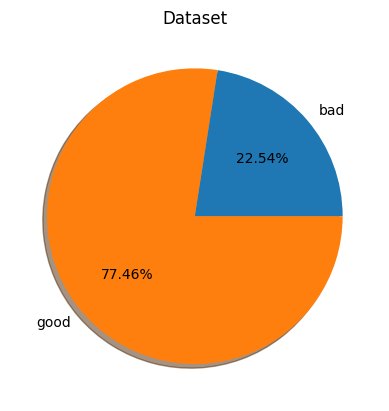

In [24]:
plt.pie(np.array(dataset.groupby(['type']).count()).reshape(-1), labels=['bad','good'], autopct='%1.2f%%',shadow=True )
plt.title("Dataset")
plt.show()

Label Encoding

In [25]:
lb = preprocessing.LabelEncoder()
dataset['type'] = lb.fit_transform(dataset['type'])
dataset

,url,type
0,image-web.com/plugins/countto/dropboxjancag,0
1,community.vzw.com/t5/DROID-X-by-Motorola/3G-hi...,1
2,abcnews.go.com/Politics/story?id=806631&page=1,1
3,kickoff.com/league/nedbank-cup/match-report/57...,1
4,youtube.com/watch?v=miTqPF9boSo,1
...,...,...
507190,www.ramseyelectronics.com/te/,1
507191,ebooks.adelaide.edu.au/r/rabelais/francois/r11...,1
507192,eu33.com/records-Pinker/,1
507193,wiki.reliccommunity.com/Relic_Online,1


In [26]:
# As we can see "Bad" = 0, and "Good" = 1, also in previous Dataset "attack"=0, "safe"=1

In [27]:
dataset.to_csv("../dataset/df_another_validation.csv",index=False)

##  Common Used Domains as Secure Urls

Moz Top 500 Domains

In [28]:
dataset3 = pd.read_csv("../dataset/top500Domains.csv")
dataset3

,Rank,Root Domain,Linking Root Domains,Domain Authority
0,1,www.blogger.com,"30,444,897",100
1,2,youtube.com,"22,932,367",100
2,3,www.google.com,"14,642,057",100
3,4,support.google.com,"5,543,097",99
4,5,play.google.com,"3,875,395",99
...,...,...,...,...
495,496,bfmtv.com,"133,368",92
496,497,ubuntu.com,"243,520",92
497,498,wallpapers.com,"177,609",92
498,499,a8.net,"466,917",92


In [29]:
ds3 = pd.DataFrame()
ds3['url'] = dataset3['Root Domain']
ds3['type'] = 'safe'
ds3

,url,type
0,www.blogger.com,safe
1,youtube.com,safe
2,www.google.com,safe
3,support.google.com,safe
4,play.google.com,safe
...,...,...
495,bfmtv.com,safe
496,ubuntu.com,safe
497,wallpapers.com,safe
498,a8.net,safe


Tranco Top 1000 Domains

In [30]:
dataset4 = pd.read_csv("../dataset/Tranco_top-1m.csv")
ds4 = pd.DataFrame(dataset4.iloc[0:1000,1:])
ds4['type']='safe'
ds4

,url,type
0,google.com,safe
1,a-msedge.net,safe
2,youtube.com,safe
3,facebook.com,safe
4,amazonaws.com,safe
...,...,...
995,criteo.net,safe
996,agkn.com,safe
997,ys7.com,safe
998,tripod.com,safe


Majestic Million Top 1000 Domains

In [31]:
dataset5 = pd.read_csv("../dataset/majestic_million.csv")
ds5 = pd.DataFrame(dataset5.iloc[0:1000,2])
ds5 = ds5.rename(columns={'Domain':'url'})
ds5['type']='safe'
ds5

,url,type
0,facebook.com,safe
1,google.com,safe
2,youtube.com,safe
3,twitter.com,safe
4,instagram.com,safe
...,...,...
995,pinimg.com,safe
996,uiowa.edu,safe
997,iastate.edu,safe
998,list-manage1.com,safe


Cisco Umberella Top 1000 Domains

In [32]:
dataset6 = pd.read_csv("../dataset/top-1m.csv")
ds6 = pd.DataFrame(dataset6.iloc[0:1000,1])
ds6['type']='safe'
ds6

,url,type
0,google.com,safe
1,microsoft.com,safe
2,netflix.com,safe
3,cloud.netflix.com,safe
4,prod.cloud.netflix.com,safe
...,...,...
995,applovin.com,safe
996,mookie1.com,safe
997,shared.global.fastly.net,safe
998,na.gateway.devices.a2z.com,safe


DomCop Top 1000 Domains

In [33]:
dataset7 = pd.read_csv("../dataset/top10milliondomains.csv")
ds7 = pd.DataFrame(dataset7.iloc[0:1000,1])
ds7 = ds7.rename(columns={'Domain':'url'})
ds7['type']='safe'
ds7

,url,type
0,facebook.com,safe
1,fonts.googleapis.com,safe
2,google.com,safe
3,twitter.com,safe
4,youtube.com,safe
...,...,...
995,strava.com,safe
996,uci.org,safe
997,lifestylesimplify.com,safe
998,pcworld.com,safe


In [34]:
df = pd.concat([ds3,ds4,ds5,ds6,ds7], axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df

,url,type
0,addons-pa.clients6.google.com,safe
1,bilibili.com,safe
2,google.de,safe
3,un.org,safe
4,cincinnatichildrens.org,safe
...,...,...
4495,tudocelular.com,safe
4496,withgoogle.com,safe
4497,linkedin.com,safe
4498,aa-rt.sharepoint.com,safe


In [35]:
df.describe()

,url,type
count,4500,4500
unique,2961,1
top,cloudflare.com,safe
freq,5,4500


In [36]:
df = df.drop_duplicates(subset=['url'])
df = df.dropna().reset_index(drop=True)
df

,url,type
0,addons-pa.clients6.google.com,safe
1,bilibili.com,safe
2,google.de,safe
3,un.org,safe
4,cincinnatichildrens.org,safe
...,...,...
2956,client-api.itunes.apple.com,safe
2957,tudocelular.com,safe
2958,withgoogle.com,safe
2959,aa-rt.sharepoint.com,safe


In [37]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df['type'] = lb.fit_transform(df['type'])
df['type'] = 1
df

,url,type
0,addons-pa.clients6.google.com,1
1,bilibili.com,1
2,google.de,1
3,un.org,1
4,cincinnatichildrens.org,1
...,...,...
2956,client-api.itunes.apple.com,1
2957,tudocelular.com,1
2958,withgoogle.com,1
2959,aa-rt.sharepoint.com,1


In [38]:
df.to_csv("../dataset/all_top_domains_merged.csv",index=False)